In [48]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score,average_precision_score,mean_absolute_error,label_ranking_average_precision_score,f1_score,r2_score,accuracy_score,average_precision_score,precision_recall_curve,PrecisionRecallDisplay
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
import tensorflow as tf
from tensorflow.keras import models, layers
from keras.callbacks import  ModelCheckpoint
import warnings
warnings.filterwarnings("ignore")

In [49]:
def collecting_image(path):
    X=[]
    Y=[]
    for i in os.listdir(path):
        for j in os.listdir(path+'/'+i):
            img=cv2.imread(path+"/"+i+'/'+j,cv2.IMREAD_GRAYSCALE)
            img=cv2.resize(img,(578, 290,))
            print(img.shape)
            X.append(img)
            Y.append(i)
    X=np.array(X)
    Y=np.array(Y)
    print(X.shape)
    # df=pd.DataFrame(X,Y)
    # df=df.sample(frac=1,random_state=1).reset_index()
    # df.columns=['Label','Image']
    return X,Y

In [50]:
X,Y=collecting_image("Crop")

(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)

(256, 256, 3)


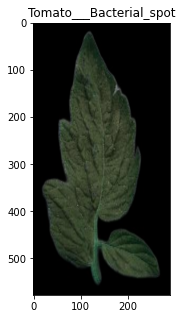

(256, 256, 3)


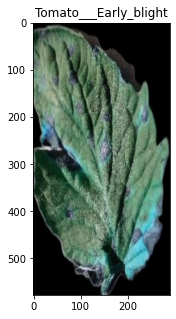

(256, 256, 3)


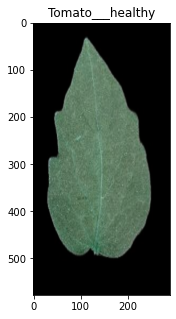

(256, 256, 3)


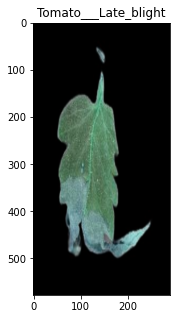

(256, 256, 3)


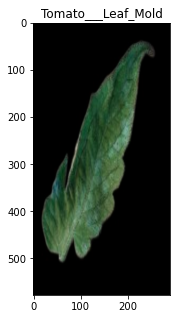

(256, 256, 3)


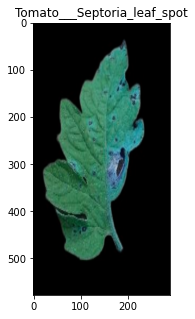

(256, 256, 3)


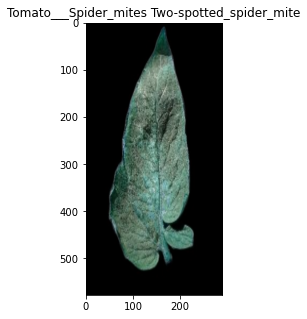

(256, 256, 3)


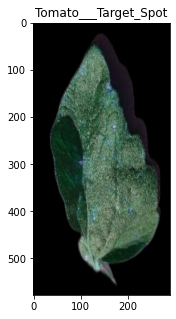

(256, 256, 3)


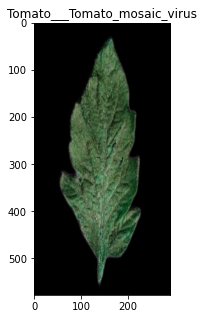

(256, 256, 3)


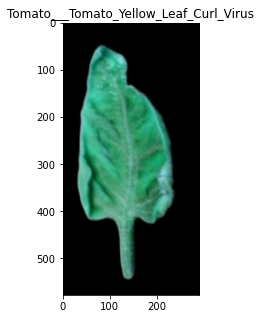

In [51]:
path="Crop"
arr=[]
names=[]
for i in os.listdir(path):
    for j in os.listdir(path+'/'+i):
        img=cv2.imread(path+"/"+i+'/'+j)
        print(img.shape)
        fig=plt.figure(figsize=(10,5))
        img=cv2.resize(img,(290,578))
        arr.append(img)
        plt.imshow(img)
        names.append(i)
        plt.title(i)
        plt.show()
        break

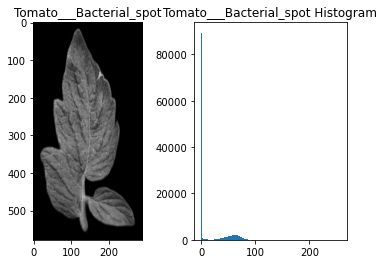

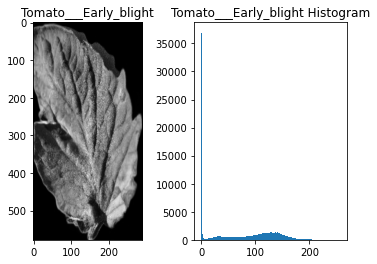

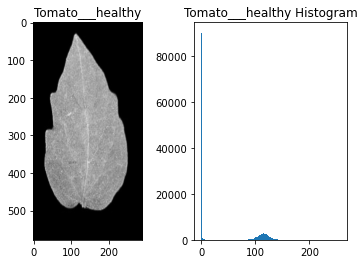

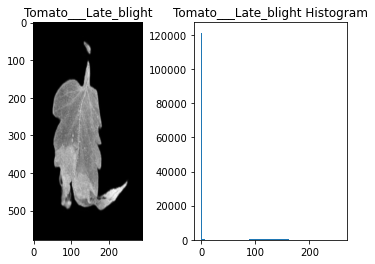

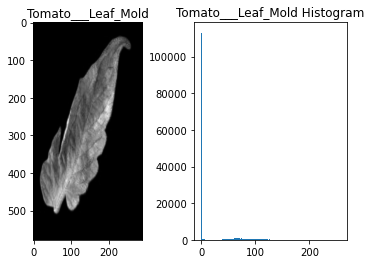

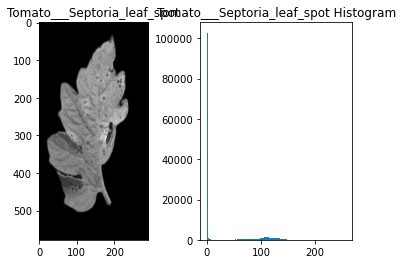

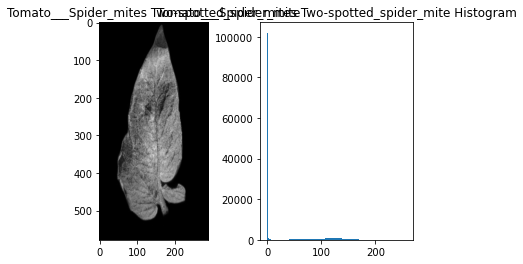

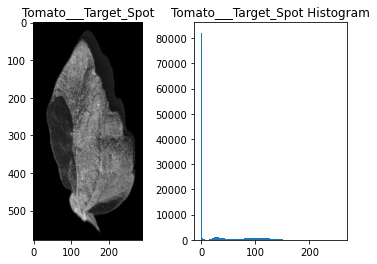

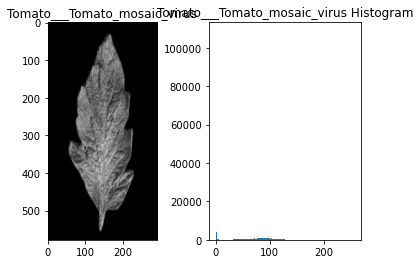

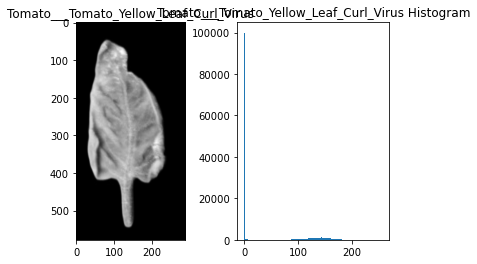

In [52]:
for i,j in zip(arr,names):
    fig,ax=plt.subplots(1,2)
    i=cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
    ax[0].imshow(i,'gray')
    ax[1].hist(i.ravel(),256,[0,256])
    ax[0].set_title(j)
    ax[1].set_title(j+" Histogram")
    plt.show()

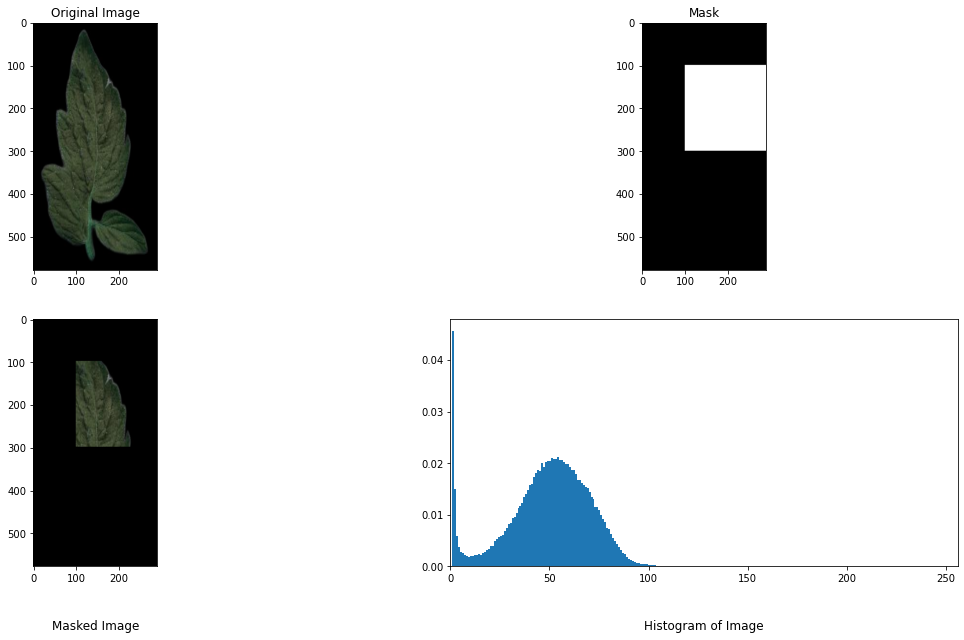

In [53]:
mask = np.zeros(arr[0].shape[:2], np.uint8)
mask[100:300, 100:400] = 255

masked_img = cv2.bitwise_and(arr[0],arr[0],mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
# hist_full = cv2.calcHist([k],[0],None,256,[1,256])
# hist_mask = cv2.calcHist([k],[0],mask,256,[1,256])

plt.figure(figsize=(20,10))
plt.subplot(221), plt.imshow(arr[0],'gray')
plt.title('Original Image')

plt.subplot(222), plt.imshow(mask,'gray')
plt.title('Mask')

plt.subplot(223), plt.imshow(masked_img,'gray')
plt.title('Masked Image',y=-0.2, pad=-14)

plt.subplot(224), plt.hist(arr[0].ravel(),256,[1,256],'gray')
plt.title('Histogram of Image',y=-0.2, pad=-14)
plt.xlim([0,256])
plt.show()

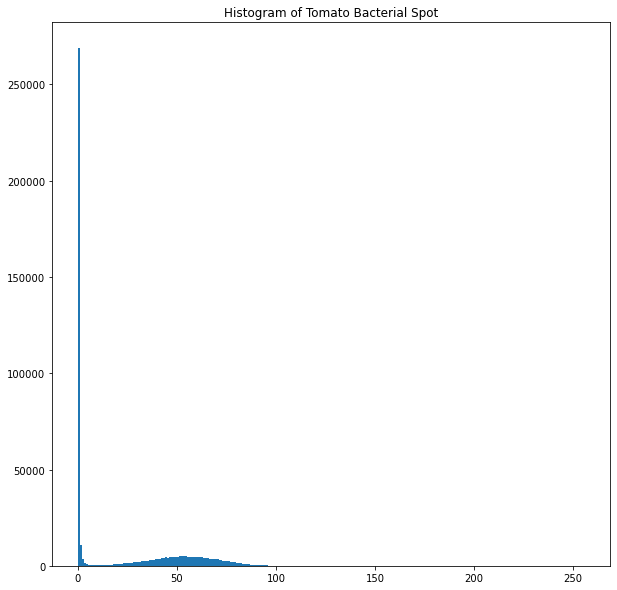

In [54]:
plt.figure(figsize=(10,10))
# hist,bins = np.histogram(k.ravel(),1,[0,10])
plt.hist(arr[0].ravel(),256,[0,256])
plt.title("Histogram of Tomato Bacterial Spot")
plt.show()

In [55]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
Y=encoder.fit_transform(Y)

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,shuffle=True)

In [57]:
import tensorflow
from tensorflow import keras
from keras import callbacks
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, LSTM, Dropout, GRU, Bidirectional,SimpleRNN,InputLayer,BatchNormalization,MaxPool2D
from tensorflow.keras.optimizers import SGD
from keras.layers import Input

In [58]:
# y_temp=np.asarray([y_train[0]])
# x_temp=np.asarray([x_train[0]])
# x_temp = x_temp.reshape((1, 290, 578, 1))
# datagen = ImageDataGenerator(rotation_range=5,  # rotation
#                                    width_shift_range=0.2,  # horizontal shift
#                                    zoom_range=0.2,  # zoom
#                                    horizontal_flip=True,  # horizontal flip
#                                    )
# i=0
# t=[]
# for x,y in datagen.flow(x_temp,y_temp,shuffle=False):
#     t.append(x[0])
#     print(i)
#     i+=1
#     if(i==10):
#         break

In [59]:
# plt.imshow(x_temp[0])
# plt.title('Original Image')
# plt.show()

# fig,ax=plt.subplots(1,5,figsize=(25,5))
# for i in range(len(t)):
#     ax[i].set_title('Augmented Image of Tomato Leaves'+str(i+1))
#     ax[i].imshow(t[i])
# plt.show()

In [60]:
# train_datagen = ImageDataGenerator(rotation_range=5,  # rotation
#                                    width_shift_range=0.2,  # horizontal shift
#                                    zoom_range=0.2,  # zoom
#                                    horizontal_flip=True,  # horizontal flip
#                                    brightness_range=[0.2,0.8])

In [61]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 20

In [62]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Crop",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 1001 files belonging to 10 classes.


In [63]:
class_names = dataset.class_names
class_names

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

(32, 256, 256, 3)
[4 6 7 0 1 0 0 3 4 7 4 5 6 7 1 2 1 9 2 3 8 2 6 4 9 7 5 6 5 4 2 9]


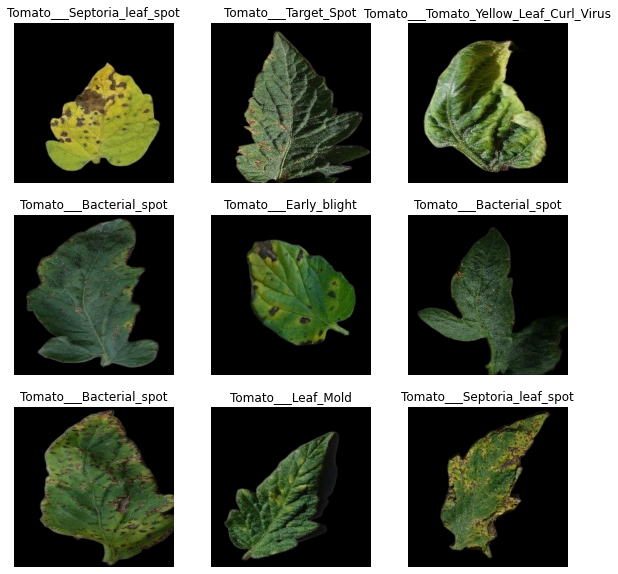

In [64]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    for i in range(0,9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [65]:
def get_dataset_partitions_tf(ds, train_split=0.9, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    test_size = int(test_split * ds_size)
    
    train_ds = ds.take(train_size)    
    test_ds = ds.skip(test_size)
    
    return train_ds, test_ds

In [66]:
train_ds, test_ds = get_dataset_partitions_tf(dataset)

In [67]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [68]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [69]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomContrast(0.2),
  layers.experimental.preprocessing.RandomZoom(0.2)
])

In [70]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10

In [71]:
# model = models.Sequential([
#     resize_and_rescale,
#     data_augmentation,
#     layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape, padding='same'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64,  kernel_size = (3,3), activation='relu', padding='same'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(128,  kernel_size = (3,3), activation='relu', padding='same'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(256,  (3, 3), activation='relu', padding='same'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Flatten(),
#     layers.Dense(256, activation='relu'),
#     layers.Dropout(0.1),
#     layers.Dense(500, activation='relu'),
#     layers.Dropout(0.1),
#     layers.Dense(n_classes, activation='softmax')
# ])

# #compiling the model
# model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
#     metrics=['accuracy']
# )

# checkpoint = ModelCheckpoint('bestmodel.h5', 
#     verbose=1, 
#     monitor='val_loss',
#     save_best_only=True, 
#     mode='auto'
# )  

# hist = model.fit(
#     train_ds,
#     validation_data=test_ds,
#     batch_size=BATCH_SIZE,
#     callbacks=[checkpoint],
#     verbose=False,
#     epochs=EPOCHS
# )

In [72]:
[((x_train), y_train)] = train_ds.take(1)
[((x_test), y_test)] = test_ds.take(1)
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)

In [73]:
train_ds

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_model(hist,model_name):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history['val_accuracy'])
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title(model_name+" accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Accuracy", "Validation Accuracy", "loss", "Validation Loss"])
    plt.show()

def plot_confusionmatrix(model,test):
    y_pred=model.predict(x_test) 
    y_pred=np.argmax(y_pred, axis=1)
    # test=np.argmax(y_test, axis=1)
    cm = confusion_matrix(test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
    disp.plot()

result=pd.DataFrame(columns=['Name of Model','accuracy',"F1-Score","R2-Score","Precision",'Recall','MAE'])
result

def addResult(model_name,model,test):
    pred=model.predict(x_test)
    pred=np.argmax(pred, axis=1)
    # test=np.argmax(y_test, axis=1)
    result.loc[len(result.index)]=[model_name,
                                    accuracy_score(pred,test),
                                    f1_score(pred,test,average='weighted'),
                                    r2_score(pred,test),
                                    precision_score(pred,test,average='weighted'),
                                    recall_score(pred,test,average='weighted'),
                                    mean_absolute_error(test,pred)]

def plot_precisionrecallcurve(model,test):
    y_pred=model.predict(x_test) 
    # y_pred=np.argmax(y_pred, axis=1)
    # test=np.argmax(test, axis=1)
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(len(class_names)):
        precision[i], recall[i], _ = precision_recall_curve(test[:, i], y_pred[:, i])
        average_precision[i] = average_precision_score(test[:, i], y_pred[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(
        test.ravel(), y_pred.ravel()
    )
    average_precision["micro"] = average_precision_score(test, y_pred, average="micro")
    display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
                                        )
    display.plot()
    _ = display.ax_.set_title("Micro-averaged over all classes")
    plt.show()


In [75]:
y_test

array([1, 0, 0, 0, 1, 0, 7, 4, 4, 1, 5, 3, 9, 4, 6, 1, 4, 3, 7, 1, 0, 5,
       4, 2, 3, 5, 0, 0, 4, 0, 6, 7])

In [76]:
# # plot_precisionrecallcurve(model,y_test)
# plot_model(hist,'ImageNet Model')
# # addResult("9",model,y_test)
# plot_confusionmatrix(model,y_test)

In [77]:
_, train_acc = model.evaluate(train_ds, verbose=0)
_, test_acc = model.evaluate(test_ds, verbose=0)
print("Training Accuracy: ",train_acc)
print("Testing Accuracy: ",test_acc)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [ ]:
def plot_auc_loss(history, epochs):
    tloss = history.history['loss']
    tauc = history.history['accuracy']

    vloss = history.history['val_loss']
    vauc = history.history['val_accuracy']

    Epochs = [i for i in range(epochs)]

    plt.style.use('fivethirtyeight')
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
    axes[0].plot(Epochs, tloss, 'r', label='Training loss')
    axes[0].plot(Epochs, vloss, 'g', label='Validation loss')
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs', fontsize=18)
    axes[0].set_ylabel('Loss', fontsize=18)
    axes[0].legend()

    axes[1].plot(Epochs, tauc, 'r', label='Training AUC')
    axes[1].plot(Epochs, vauc, 'g', label='Validation AUC')
    axes[1].set_title('Training and Validation AUC')
    axes[1].set_xlabel('Epochs', fontsize=18)
    axes[1].set_ylabel('AUC', fontsize=18)
    axes[1].legend()

    plt.tight_layout()
    plt.show()

    return Epochs

Epochs = plot_auc_loss(hist, EPOCHS)


NameError: name 'hist' is not defined

In [79]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import Xception # TensorFlow ONLY
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import argparse
import cv2

In [82]:
MODELS = {
	"vgg16": VGG16(include_top=False, input_shape=(256, 256, 3), weights='imagenet'),
	"vgg19": VGG19(),
	"inception": InceptionV3(),
	"xception": Xception(), # TensorFlow ONLY
	"resnet": ResNet50()
}

58889256/58889256 [==============================] - 26s 0us/step


In [84]:
from keras.models import Model

for model_name in MODELS:
    conv_base=MODELS[model_name]

    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dense(1072, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
    
    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    checkpoint = ModelCheckpoint(model_name+'.h5', 
        verbose=1, 
        monitor='val_loss',
        save_best_only=True, 
        mode='auto'
    )  
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        metrics=['accuracy']
    )

    hist = model.fit(
        train_ds,
        validation_data=test_ds,
        batch_size=BATCH_SIZE,
        callbacks=[checkpoint],
        verbose=False,
        epochs=EPOCHS
    )
    
    plot_model(hist,model_name+' Model')
    plot_confusionmatrix(model,y_test)

    _, train_acc = model.evaluate(train_ds, verbose=0)
    _, test_acc = model.evaluate(test_ds, verbose=0)
    print("Training Accuracy: ",train_acc)
    print("Testing Accuracy: ",test_acc)


Epoch 1: val_loss improved from inf to 1.80953, saving model to vgg16.h5
